# Galilean relativity

Before Einstein, there was already a principle of relativity called Galilean relativity. It makes sense to have a good grasp on this earlier kind of relativity before getting into special relativity, because much of the ideas will remain the same, but Galilean relativity is easier to understand.


### Sources

Leonard Susskind's book [The Theoretical Minimum: Special Relativity and Classical Field Theory](https://en.wikipedia.org/wiki/The_Theoretical_Minimum) briefly describes Galilean relativity, but not in nearly as much detail as it describes special relativity.

The [Wikipedia article on Galilean relativity](https://en.wikipedia.org/wiki/Galilean_invariance) is also a good resource.

### What is Galilean relativity?

Galilean relavitity gives a solution for how to describe a system in multiple different inertial reference frames. An inertial reference frame is a coordinate system that is traveling at a constant speed, not accelerating. 

Note: I'm going to just say "frame" from now, but keep in mind that I actually mean "inertial reference frame". Non-inertial reference frames have different rules.

Galilean relativity states that:

* The laws of physics are the same for all inertial observers. In other words, the equations of motion for a system are the same in all frames. A consequence of this is that if an object is accelerating in one frame, it is accelerating in all other frames.

* Time is a universal coordinate. If we set a clock's timer for one minute and let the clock move at a constant velocity, all inertial observers travelling at any velocity will be able to measure with their own clocks that the timer rings exactly one minute after it was set.

If we have some function $x = f(t)$ in frame $S$, we can use the Galilean relativity principle to find out how to express that same function using the coordinate system of some other frame $S'$ that is moving at a velocity of $v$ with respect to frame $S$. I won't prove it, but the following equations are the answer, if $S$ and $S'$ share the same origin. This is called the Galilean transformation:

$$ t' = t $$
$$ x' = x - vt $$


### Accelerating train

Let's consider an example. You are standing on the ground watching a train that is stopped on the tracks. At $t=0$, it starts accelerating by $\ddot{x} = a_{train}$. Since you are stationary in your own frame, your velocity is $\dot{x} = v_{you} = 0$. I'm driving a car at a constant speed $\dot{x} = v_{me}$ parallel to the accelerating train. At $t=0$, you, me, and the train are all at position $x=0$.

<!-- Google Drawings: https://docs.google.com/drawings/d/1pAWGjCTURB9KXIIbsAgWq8OXL8RyS4DNTIzRv6aV9uw/edit?usp=sharing -->
<img src="images/accelerating-train.png" />

Let's simulate this example, with $v_{you} = 0$, $v_{me} = 0.5$, and $a_{train} = 0.5$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import physics_sims

class GalileanTrain(physics_sims.Sim):
    def __init__(self, t, x_you, x_me, x_train, v_you, v_me, v_train, a_train):
        self.t = t

        self.x_you = x_you
        self.x_me = x_me
        self.x_train = x_train

        self.v_you = v_you
        self.v_me = v_me
        self.v_train = v_train

        self.a_train = a_train

    def state(self):
        return [self.t, self.x_you, self.x_me, self.x_train]
    
    def update(self, sim_runner, dt):
        self.x_me = self.x_me + dt * self.v_me
        self.x_you = self.x_you + dt * self.v_you
        self.v_train = self.v_train + dt * self.a_train
        self.x_train = self.x_train + dt * self.v_train
        self.t = self.t + dt

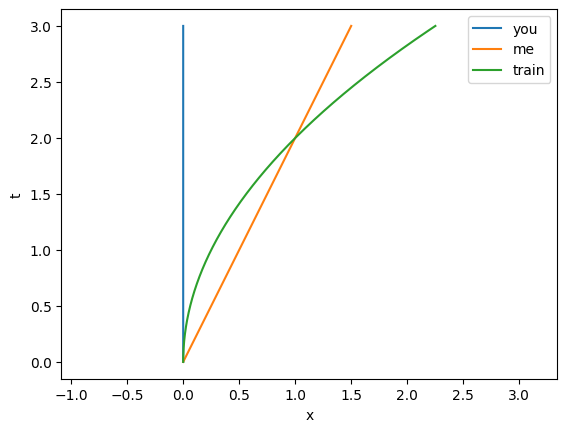

In [2]:
traj_you = physics_sims.SimRunner().run_headless(GalileanTrain(
    t=0,

    x_you=0,
    v_you=0,

    x_me=0,
    v_me=0.5,

    x_train=0,
    v_train=0,
    a_train=0.5,
    
    ), 3)

plt.plot(traj_you[..., 1], traj_you[..., 0], label='you')
plt.plot(traj_you[..., 2], traj_you[..., 0], label='me')
plt.plot(traj_you[..., 3], traj_you[..., 0], label='train')
plt.axis('equal')
plt.legend()
plt.ylabel('t')
plt.xlabel('x')
plt.show()

With these parameters, we can see that the train catches up to my position $x=1$ at time $t=2$. Also, after $t=4$, I have moved to $x=1.5$. These things can also be shown mathematically without a simulation, but I won't show that here since it's very simple to do with basic calculus.

In order to see what happens in my frame of reference, we can use the Galilean transformation. One way to do that would be to take the whole trajectory of the system and subtract $v_{me}t$ from the positions of you, me, and the train at all times, since the transformation equations say that $x' = x - v_{me}t$.

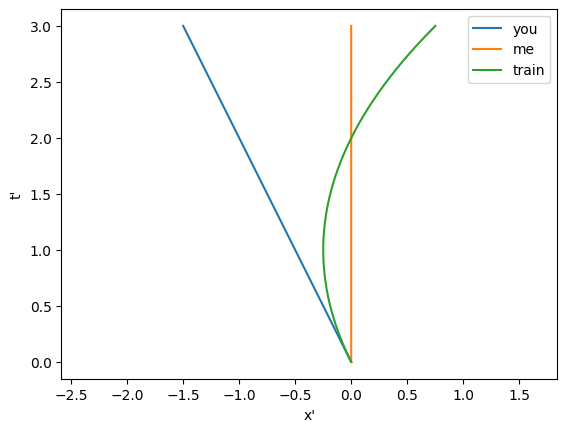

In [3]:
time = traj_you[..., [0]]
traj_me = traj_you - 0.5 * time * [[0, 1, 1, 1]]

plt.plot(traj_me[..., 1], traj_me[..., 0], label='you')
plt.plot(traj_me[..., 2], traj_me[..., 0], label='me')
plt.plot(traj_me[..., 3], traj_me[..., 0], label='train')
plt.axis('equal')
plt.legend()
plt.ylabel("t'")
plt.xlabel("x'")
plt.show()

As you can see, I am not moving in my own frame. At $t'=0$, you and the train are moving to the left of me at speed 0.5. At $t'=2$, the train has caught up to me again, which is the same amount of time that it took in your frame. Also, after $t'=3$, you have moved to $x'=-1.5$. This is all what you would expect if you're familiar with nonrelativistic physics.

There's another way we can do the transformation. Instead of transforming all the points in the trajectories, we could transform just the initial state into my frame and then rerun the simulation. Since the equations of motion are the same in all frames, this will produce the same trajectories as in the plot above. Let's try it out.

Since you, me, and the train are all at $x=0$ at time $t=0$ in your frame, we'll still be at $x'= x - v_{me} t = 0 - v_{me}0 = 0$ in my frame at $t'=0$. But our velocities will be different. Let's take the time derivative of the transformation equation to find the initial velocities.

$$ \frac{d}{dt}(x') = \frac{d}{dt}(x - v_{me} t) $$
$$ \dot{x'} = \dot{x} - v_{me}$$

This just means that to find all of our initial velocities in my frame, we need to subtract my velocity from each of our velocities. That gives:

$$ v_{you}' = v_{you} - v_{me} = 0 - v_{me} = -v_{me}$$
$$ v_{train}' = v_{train} - v_{me} = 0 - v_{me} = -v_{me}$$
$$ v_{me}' = v_{me} - v_{me} = 0 $$


As for our accelerations, they should be the same in both frames, as I mentioned earlier. We can show that by taking the second time derivative of the transformation equation.

$$ \frac{d^2}{dt^2}(x') = \frac{d^2}{dt^2}(x - v_{me}t) $$

$$ \frac{d}{dt}(\dot{x'}) = \frac{d}{dt}(\dot{x} - v_{me}) $$

$$ \ddot{x'} = \ddot{x} $$

Let's rerun the simulation with the transformed initial state.

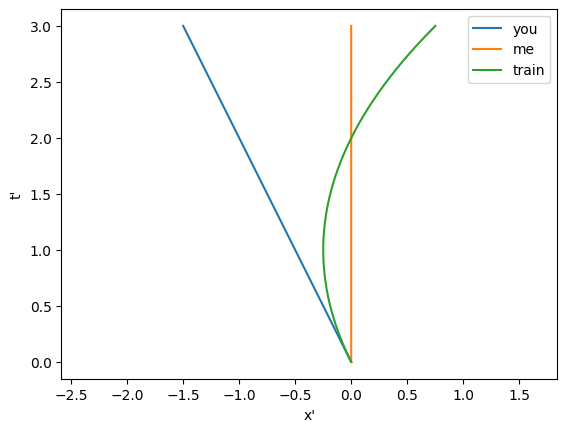

In [4]:
traj_me_resim = physics_sims.SimRunner().run_headless(GalileanTrain(
    t=0,

    x_you=0,
    v_you=-0.5,

    x_me=0,
    v_me=0,

    x_train=0,
    v_train=-0.5,
    a_train=0.5,

    ), 3)

plt.plot(traj_me_resim[..., 1], traj_me_resim[..., 0], label='you')
plt.plot(traj_me_resim[..., 2], traj_me_resim[..., 0], label='me')
plt.plot(traj_me_resim[..., 3], traj_me_resim[..., 0], label='train')
plt.axis('equal')
plt.legend()
plt.ylabel("t'")
plt.xlabel("x'")
plt.show()

As you can see, this is the same plot that we got earlier.

### Adding velocities

Let's look at another example with Galilean relativity. Let's say you're standing still watching a person walking at a constant velocity on a train that's moving at a constant velocity. If I tell you that the train is moving at velocity $\dot{x}_{train}=v_{train}$ in your frame, $S$, and that the person is moving at velocity $\dot{x'}_{walk} = v_{walk}$ in the train's frame, $S'$, can you tell me what the person's velocity is in your frame?

Of course, you know that the answer is to simply add the velocities together. So in your frame, the walking person is moving at velocity $\dot{x}=v_{train} + v_{walk}$. But do we get that answer if we use the Galilean transformation? To find out, we'll have to use the time derivative of the Galilean transformation that we used earlier.

$$ \dot{x'} = \dot{x} - v$$

Remember that $v$ in the Galilean transformation is supposed to be the velocity of frame $S'$ with respect to $S$. In our case, that's just $v_{train}$.

We have the velocity of the walking person in frame $S'$, $\dot{x'}_{walk} = v_{walk}$, so we'll substitute that as well.

$$ v_{walk} = \dot{x} - v_{train} $$

$$ \dot{x} = v_{train} + v_{walk} $$

And that's the answer we expected.

### 3D Galilean transformation

Accounting for all three spatial dimensions in a Galilean transformation is conceptually very easy. The velocity of $S'$ with respect to $S$ becomes a 3-vector $\textbf{v} = (v_x, v_y, v_z)$. However, we can choose an x-axis such that $v_x$ is the only nonzero component, so $\textbf{v} = (v, 0, 0)$. Then transformations become:

$$ t' = t $$
$$ x' = x - vt $$
$$ y' = y $$
$$ z' = z $$

This can be turned into a multiplication between a matrix and a vector. Let's combine the time and position coordinates into one object, called an event. An event is just a time and a place. We'll use the vector $\textbf{X}$ to represent an event.

$$ \textbf{X} = (t, x, y, z) $$

We can index into the event like so: $X^\mu$

$\mu$ can range between 0 and 3, where the 0-th dimension is the time dimension.

$$\textbf{X} = (X^0, X^1, X^2, X^3) $$

$\textbf{X}$ is known as a 4-vector because it represents a point in 3+1-dimensional Galilean spacetime--the "3" represents the spatial dimensions and the "+1" represents the time dimension.

In matrix form, the Galilean transformation is:

$$ \textbf{X}' = G_x(v) \textbf{X} $$

$$

\begin{equation*}
G_x(v) = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
-v & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}
\end{equation*}

$$

We can see that this makes sense if we substitute the components of $\textbf{X}$ and $\textbf{X}'$ back in and multiplying through.

$$

\begin{equation*}
\begin{pmatrix}
t' \\
x' \\
y' \\
z' \\
\end{pmatrix}

=

\begin{pmatrix}
1 & 0 & 0 & 0 \\
-v & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}

\begin{pmatrix}
t \\
x \\
y \\
z \\
\end{pmatrix}

=

\begin{pmatrix}
t \\
x - vt \\
y \\
z \\
\end{pmatrix}

\end{equation*}

$$

We can also express this matrix-vector multiplication in a form parameterized by an index into $\textbf{X}'$.

$$ X'^\mu = (G_x)^\mu_\nu X^\nu $$

$X'^\mu$ is the $\mu$-th element of $\textbf{X}'$, and it can take the values 0 through 3. $(G_x)^\mu_\nu$ is the element of the matrix $G_x$ that is in the $\mu$-th column and $\nu$-th row.

The term $(G_x)^\mu_\nu X^\nu$ actually stands for $\sum_\nu{(G_x)^\mu_\nu X^\nu}$, where $\nu$ ranges over all four dimensions. Removing the summation like this is called the Einstein summation convention. Any time we have a multiplication between two terms with that have the same index, and one index is upper and the other is lower, the operation is actually a summation of products like this.

In order to keep track of the meanings of the upper and lower indices of a matrix, rather than trying to memorize which one is a column index or row index, I find it useful to just remember the procedure for doing a matrix-vector multiplication and then it becomes clear which one is which.

### 4-velocity

We can use the Galilean transformation matrix $G_x(v)$ to transform not just events but also velocity vectors. However, we have to somehow express a velocity as a 4-vector. In order to do that, we'll just need to remember that velocity is the time derivative of position, and an event is a position in spacetime. So a 4-vector representing a velocity is the time derivative of the 4-vector for an event:

$$\dot{\textbf{X}} = \frac{\partial \textbf{X}}{\partial t} =

\begin{pmatrix}
\dfrac{dt}{dt} \\
\\
\dfrac{dx}{dt} \\
\\
\dfrac{dy}{dt} \\
\\
\dfrac{dz}{dt} \\
\end{pmatrix}

=

\begin{pmatrix}
1 \\
\dot{x} \\
\dot{y} \\
\dot{z} \\
\end{pmatrix}
$$

$\dot{\textbf{X}}$ is called a 4-velocity, and we can transform it just like any other 4-vector.

$$ \dot{\textbf{X}}' = G_x(v) \dot{\textbf{X}} $$

$$

\dot{\textbf{X}}' =

\begin{equation*}
\begin{pmatrix}
1 \\
\dot{x}' \\
\dot{y}' \\
\dot{z}' \\
\end{pmatrix}

=

\begin{pmatrix}
1 & 0 & 0 & 0 \\
-v & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}

\begin{pmatrix}
1 \\
\dot{x} \\
\dot{y} \\
\dot z \\
\end{pmatrix}

=

\begin{pmatrix}
1 \\
\dot x - v \\
\dot y \\
\dot z \\
\end{pmatrix}

\end{equation*}

$$

That gives exactly the result we would expect. If an object is moving in the x-dimension of frame $S$ by velocity $\dot{x} = v_0$, it will be moving by velocity $\dot{x}' = v_0 - v$ in another frame $S'$ which is moving at velocity $v$ with respect to frame $S$. 3-velocities are added and subtracted together accordingly, like we saw earlier.

In Galilean relativity, $\dot{\textbf{X}}^0 = 1$ must be true for all 4-velocities, and it is essentially just a notational trick to allow us to use the Galilean matrix transformation on velocity vectors. So that component doesn't really seem to have a deep meaning.

However, in special relativity, that component is not always 1, and it will have a very important meaning. Just to give a small preview: In special relativity, a clock that is moving in some frame $S$ always ticks more slowly than a clock that is not moving in the same frame, and the $\dot{\textbf{X}}^0$ component of the moving clock's 4-velocity is the ratio between the ticking frequency between the moving clock and the stationary clock.

### Is there an invariant Galilean spacetime distance?

In just the spatial dimensions, we have a concept of the distance between two events, being $dr = \sqrt{(dx)^2 + (dy)^2 + (dz)^2} $. That's just the Pythagorean theorem with a third spatial dimension added to it. The spatial distance between the events is preserved, or invariant, for translations and rotations in space. Distance is also invariant under Galilean transformations, but only for two events which have the same time coordinate.

We also have a concept of the amount of time between two events, $dt$, which is invariant under Galilean transformations because the time coordinate is universal.

We could ask the question: Is there a concept of distance which combines the displacements in both space and time into one quantity? This spacetime distance would have to have the property of being preserved in all reference frames. In other words, it would be preserved under translations and rotation in space, and it would also be invariant under Galilean transformations. What if we just tried the same formula as the spatial distance but we just add the time dimension to it like so: $ds = \sqrt{(dt)^2 + (dx)^2 + (dy)^2 + (dz)^2}$?

In order to test this out, we'll find the distance between the origin and some arbitrary event in two different reference frames, where frame $S'$ is moving at velocity $\dot{x}=v$ with respect to frame $S$. If the distance is invariant in both frames, the two results should be equal to each other.

$$ \sqrt{t^2 + x^2 + y^2 + z^2} = \sqrt{t'^2 + x'^2 + y'^2 + z'^2} $$
$$ t^2 + x^2 + y^2 + z^2 = t^2 + (x - vt)^2 + y^2 + z^2 $$
$$ x^2 = (x - vt)^2 $$
$$ x = x - vt $$
$$ 0 = vt $$

Clearly, this distance formula only works if either $v=0$ or $t=0$. So it's wrong, because both the velocity $v$ and time coordinate $t$ are allowed to be nonzero.

Maybe for some reason the components of each of the dimensions need to contribute different amounts to the distance formula. We can try to modify the formula to add some scalars to the terms for each of the components, like so: $ds = \sqrt{\alpha(dt)^2 + \beta(dx)^2 + \gamma(dy)^2 + \delta(dz)^2} $.

$$ \sqrt{\alpha t^2 + \beta x^2 + \gamma y^2 + \delta z^2} = \sqrt{\alpha t'^2 + \beta x'^2 + \gamma y'^2 + \delta z'^2} $$
$$ \alpha t^2 + \beta x^2 + \gamma y^2 + \delta z^2 = \alpha t^2 + \beta (x - vt)^2 + \gamma y^2 + \delta z^2 $$
$$ \beta x^2 = \beta (x - vt)^2 $$
$$ x^2 = (x - vt)^2 $$
$$ x = x - vt $$
$$ vt = 0 $$

Unfortunately, that distance formula doesn't work either.

It seems that there is no single formula for a spacetime distance between two events which is invariant under the Galilean transformation.  Space displacements and time displacements are just separate quantities which apparently cannot be combined into one quantity in a meaningful way.

But that doesn't seem to be a problem--we were just asking whether such a spacetime distance exists, and it seems that the answer is no. We don't have an argument for why the answer should necessarily be yes, so Galilean relativity is still aparently self-consistent.

However, this is one of the big differences between Galilean relativity and special relativity. In special relativity, there is a formula for a spacetime distance which is invariant under reference frame transformations.